#**Deeplearning project**:
**Title**

Face recognition with occlusion and orientation

**Team members**

1.   Abhishek S Mayya
2.   Shreyansh Acharya

**Project Description**

This project centers on enhancing face recognition systems to effectively identify individuals in images despite occlusions and variations in facial orientation,leveraging existing face detection and recognition models.

**Data**

We have used brazilian face dataset.Brazilian face database that contains a total of 2800 images, 14 images for each of 200 individuals.And also there are 2 seperate frontal images for each of the 200 individuals.

Link to the dataset : https://fei.edu.br/~cet/facedatabase.html

Preprocessing and data preparation is in the following file.

https://colab.research.google.com/drive/16yLRWvs6Qfvf5hgmIOlIHmEqC3fZniDr?usp=sharing

**Reference**

https://github.com/rcmalli/keras-vggface

In [ ]:
!pip install tensorflow==2.12 tensorflow-addons[tensorflow]
#!pip install keras-vggface
!sudo pip install git+https://github.com/rcmalli/keras-vggface.git


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 9.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tensorflow-addons[tensorflow] to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.3/612.3 kB 15.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing insta

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-3mgpdtnm
  Running command git clone --filter=blob:none --quiet https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-3mgpdtnm
  Resolved https://github.com/rcmalli/keras-vggface.git to commit bee35376e76e35d00aeec503f2f242611a97b38a
  Preparing metadata (setup.py) ... done
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8294 sha256=41f062327bfea558fa9fee716e642e467bf8115072330544db7d0c7a4937a87f
  Stored in directory: /tmp/pip-ephem-wheel-cache-1men66fo/wheels/62/cd/e0/3a2d2fe84d014324aed54d420cab52df65a774d9b296c63996
Successfully built keras-vggface


In [ ]:
!pip install keras_applications --no-deps
#!pip show keras-vggface
!pip install keras-util
!pip install keras_applications

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for keras-util: filename=keras_util-0.0.2-py3-none-any.whl size=2121 sha256=f3cad439ec1f579932e1838decd79afc316926ef65b273909117e29a1a29e5eb
  Stored in directory: /root/.cache/pip/wheels/e5/69/21/3cefc76ae3337f3bcfa0e2d07fd54370a4d39b4a34a9e1ed32
Successfully built keras-util


In [ ]:
#!pip uninstall keras_vggface
!pip install keras_vggface==0.6

#to handle topology error

In [ ]:
filename = "/usr/local/lib/python3.10/dist-packages/keras_vggface/models.py"
text = open(filename).read()
open(filename, "w+").write(text.replace('keras.engine.topology', 'tensorflow.keras.utils'))
import tensorflow as tf

#to handle layer_utils error

In [ ]:
#!pip uninstall keras
!pip install keras==2.12

In [ ]:
from keras.utils import layer_utils

In [ ]:
import keras_vggface

In [ ]:
print(keras_vggface.__version__)

0.6


In [ ]:
from keras.utils import plot_model
from keras.models import load_model
from keras.preprocessing import image
from keras_vggface.utils import preprocess_input
from keras.utils import get_source_inputs
from keras.engine.base_layer import Layer

In [ ]:
from keras.utils import get_source_inputs
from tensorflow.python.keras.utils.data_utils import get_file
from tensorflow.python.keras.utils import layer_utils

In [ ]:
import numpy as np
import pandas as pd
from keras.preprocessing import image
from keras_vggface.vggface import VGGFace
from keras_vggface import utils

In [ ]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense
from keras.models import Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Create register using frontal face

In [ ]:
# Load VGG-Face model
vgg_model = VGGFace(model='vgg16', include_top=False, input_shape=(224, 224, 3), pooling='avg')
vgg_model.trainable = False

In [ ]:
vgg_model.summary()

Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

##Functions

In [ ]:
from skimage.transform import resize
from PIL import Image
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score

In [ ]:
# Function to preprocess images
def preprocess_image(img):
    # Resize the image
    img = resize(img, (224, 224), anti_aliasing=True)
    img= img/255
    return img

# Generate embeddings for a single image
def generate_embedding(img):
    img=preprocess_image(img)
    img = np.expand_dims(img, axis=0)
    embedding = vgg_model.predict(img)
    embedding=embedding/np.max(embedding)
    return embedding.flatten()

# Function to generate embeddings for a list of images
def generate_embeddings(image_data):
    embeddings = []
    for img in image_data:
        # Generate embedding for the preprocessed image
        embedding = generate_embedding(img)
        embeddings.append(embedding)
    return np.array(embeddings)

In [ ]:
# Function to compare embeddings and assign ID with most similarity
def find_most_similar_face(test_embedding, register_faces_dict):
    similarities = []
    test_embedding=test_embedding.reshape(1,-1)
    for id, registered_embedding in register_faces_dict.items():
        registered_embedding=registered_embedding.reshape(1,-1)
        similarity = cosine_similarity(test_embedding, registered_embedding)
        similarities.append(similarity)
    most_similar_index = np.argmax(similarities)
    most_similar_id = list(register_faces_dict.keys())[most_similar_index]
    return most_similar_id


##Dictionary register

In [ ]:
df_faces=pd.read_pickle("/content/drive/MyDrive/face_register.pkl")

In [ ]:
register_faces_dict = {}

# Iterate over IDs ranging from 1 to 200
for id in range(1, 201):
    print("Processing ID:", id)
    # Filter the DataFrame for the current ID
    group = df_faces[df_faces['ID'] == str(id)]
    face_images = group['face'].values
    # Generate embeddings for face images
    embeddings = generate_embeddings(face_images)
    # Compute the average embedding for the current ID
    avg_embedding = np.mean(embeddings, axis=0)

    # Add the ID and its corresponding embedding to the dictionary
    register_faces_dict[id] = avg_embedding

In [ ]:
import pickle

In [ ]:
with open('register_faces_dict.pkl', 'wb') as f:
    pickle.dump(register_faces_dict, f)

##Test images with orientation

In [ ]:
with open('register_faces_dict.pkl', 'rb') as f:
    register_faces_dict = pickle.load(f)

In [ ]:
# Load test images from pickle file as DataFrame
df_test = pd.read_pickle('/content/drive/MyDrive/project/processed_dataset.pkl')


In [ ]:
test_images = df_test['face'].values
true_ids = df_test['ID'].values
# Generate embeddings for test images
test_embeddings = generate_embeddings(test_images)

1/1 [==============================] - 1s 506ms/step


In [ ]:
assigned_ids = []
for test_embedding in test_embeddings:
    most_similar_id = find_most_similar_face(test_embedding, register_faces_dict)
    assigned_ids.append(most_similar_id)

In [ ]:
true_ids=true_ids.astype('int')

In [ ]:
true_ids

array([ 56, 164,  98, ...,  75,  80, 100])

In [ ]:
assigned_ids

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(true_ids, assigned_ids)
print("Accuracy:", accuracy)

Accuracy: 0.9456247749369824


##Test images with central occulusion(15%)

In [ ]:
with open('register_faces_dict.pkl', 'rb') as f:
    register_faces_dict = pickle.load(f)

In [ ]:
# Load test images from pickle file as DataFrame
df_central = pd.read_pickle('/content/drive/MyDrive/central_occ.pkl')

In [ ]:
test_images_c = df_central['face'].values
true_ids_c = df_central['ID'].values
# Generate embeddings for test images
test_embeddings_c = generate_embeddings(test_images_c)

1/1 [==============================] - 1s 518ms/step


In [ ]:
assigned_ids_c = []
for test_embedding in test_embeddings_c:
    most_similar_id = find_most_similar_face(test_embedding, register_faces_dict)
    assigned_ids_c.append(most_similar_id)

In [ ]:
true_ids_c=true_ids_c.astype('int')

In [ ]:
# Calculate accuracy
accuracy_c = accuracy_score(true_ids_c, assigned_ids_c)
print("Accuracy:", accuracy_c)

Accuracy: 0.785


##Test images with right occulusion(15%)

In [ ]:
# Load test images from pickle file as DataFrame
df_right = pd.read_pickle('/content/drive/MyDrive/right_occ.pkl')

In [ ]:
test_images_r = df_right['face'].values
true_ids_r = df_right['ID'].values
# Generate embeddings for test images
test_embeddings_r = generate_embeddings(test_images_r)


1/1 [==============================] - 1s 530ms/step


In [ ]:
assigned_ids_r = []
for test_embedding in test_embeddings_r:
    most_similar_id = find_most_similar_face(test_embedding, register_faces_dict)
    assigned_ids_r.append(most_similar_id)

In [ ]:
true_ids_r=true_ids_r.astype('int')

In [ ]:
# Calculate accuracy
accuracy_r = accuracy_score(true_ids_r, assigned_ids_r)
print("Accuracy:", accuracy_r)

Accuracy: 0.805


##Test images with left occulusion(15%)

In [ ]:
# Load test images from pickle file as DataFrame
df_left = pd.read_pickle('/content/drive/MyDrive/left_occ.pkl')

In [ ]:
test_images_l = df_left['face'].values
true_ids_l = df_left['ID'].values
# Generate embeddings for test images
test_embeddings_l = generate_embeddings(test_images_l)


1/1 [==============================] - 1s 905ms/step


In [ ]:
assigned_ids_l = []
for test_embedding in test_embeddings_l:
    most_similar_id = find_most_similar_face(test_embedding, register_faces_dict)
    assigned_ids_l.append(most_similar_id)

In [ ]:
true_ids_l=true_ids_l.astype('int')

In [ ]:
# Calculate accuracy
accuracy_l = accuracy_score(true_ids_l, assigned_ids_l)
print("Accuracy:", accuracy_l)

Accuracy: 0.91


##Test images with central occulusion(5%)

In [ ]:
import pickle
with open('/content/drive/MyDrive/register_faces_dict.pkl', 'rb') as f:
     register_faces_dict = pickle.load(f)

In [ ]:
# Load test images from pickle file as DataFrame
df_central = pd.read_pickle('/content/drive/MyDrive/central_occ5.pkl')


In [ ]:
test_images_c = df_central['face'].values
true_ids_c = df_central['ID'].values
# Generate embeddings for test images
test_embeddings_c = generate_embeddings(test_images_c)

1/1 [==============================] - 1s 540ms/step


In [ ]:
assigned_ids_c = []
for test_embedding in test_embeddings_c:
    most_similar_id = find_most_similar_face(test_embedding, register_faces_dict)
    assigned_ids_c.append(most_similar_id)

In [ ]:
true_ids_c=true_ids_c.astype('int')

In [ ]:
# Calculate accuracy
accuracy_c = accuracy_score(true_ids_c, assigned_ids_c)
print("Accuracy:", accuracy_c)

Accuracy: 0.95


##Test images with right occulusion(5%)

In [ ]:
# Load test images from pickle file as DataFrame
df_right = pd.read_pickle('/content/drive/MyDrive/right_occ5.pkl')

In [ ]:
test_images_r = df_right['face'].values
true_ids_r = df_right['ID'].values
# Generate embeddings for test images
test_embeddings_r = generate_embeddings(test_images_r)

1/1 [==============================] - 1s 990ms/step


In [ ]:
assigned_ids_r = []
for test_embedding in test_embeddings_r:
    most_similar_id = find_most_similar_face(test_embedding, register_faces_dict)
    assigned_ids_r.append(most_similar_id)

In [ ]:
true_ids_r=true_ids_r.astype('int')

In [ ]:
# Calculate accuracy
accuracy_r = accuracy_score(true_ids_r, assigned_ids_r)
print("Accuracy:", accuracy_r)

Accuracy: 0.985


##Test images with left occulusion(5%)

In [ ]:
# Load test images from pickle file as DataFrame
df_left = pd.read_pickle('/content/drive/MyDrive/left_occ5.pkl')

In [ ]:
test_images_l = df_left['face'].values
true_ids_l = df_left['ID'].values
# Generate embeddings for test images
test_embeddings_l = generate_embeddings(test_images_l)


1/1 [==============================] - 1s 566ms/step


In [ ]:
assigned_ids_l = []
for test_embedding in test_embeddings_l:
    most_similar_id = find_most_similar_face(test_embedding, register_faces_dict)
    assigned_ids_l.append(most_similar_id)

In [ ]:
true_ids_l=true_ids_l.astype('int')

In [ ]:
# Calculate accuracy
accuracy_l = accuracy_score(true_ids_l, assigned_ids_l)
print("Accuracy:", accuracy_l)

Accuracy: 0.99


##Test images with central occulusion(15%) and Orientation

In [ ]:
with open('/content/drive/MyDrive/register_faces_dict.pkl', 'rb') as f:
    register_faces_dict = pickle.load(f)

In [ ]:
# Load test images from pickle file as DataFrame
df_central = pd.read_pickle('/content/drive/MyDrive/central_occ_o.pkl')

In [ ]:
test_images_c = df_central['face'].values
true_ids_c = df_central['ID'].values
# Generate embeddings for test images
test_embeddings_c = generate_embeddings(test_images_c)

1/1 [==============================] - 1s 1s/step


In [ ]:
assigned_ids_c = []
for test_embedding in test_embeddings_c:
    most_similar_id = find_most_similar_face(test_embedding, register_faces_dict)
    assigned_ids_c.append(most_similar_id)

In [ ]:
true_ids_c=true_ids_c.astype('int')

In [ ]:
# Calculate accuracy
accuracy_c = accuracy_score(true_ids_c, assigned_ids_c)
print("Accuracy:", accuracy_c)

Accuracy: 0.595


##Test images with right occulusion(15%) and Orientation

In [ ]:
# Load test images from pickle file as DataFrame
df_right = pd.read_pickle('/content/drive/MyDrive/right_occ_o.pkl')

In [ ]:
test_images_r = df_right['face'].values
true_ids_r = df_right['ID'].values
# Generate embeddings for test images
test_embeddings_r = generate_embeddings(test_images_r)

1/1 [==============================] - 1s 614ms/step


In [ ]:
assigned_ids_r = []
for test_embedding in test_embeddings_r:
    most_similar_id = find_most_similar_face(test_embedding, register_faces_dict)
    assigned_ids_r.append(most_similar_id)

In [ ]:
true_ids_r=true_ids_r.astype('int')

In [ ]:
# Calculate accuracy
accuracy_r = accuracy_score(true_ids_r, assigned_ids_r)
print("Accuracy:", accuracy_r)

Accuracy: 0.71


##Test images with left occulusion(15%) and Orientation

In [ ]:
# Load test images from pickle file as DataFrame
df_left = pd.read_pickle('/content/drive/MyDrive/left_occ_o.pkl')

In [ ]:
test_images_l = df_left['face'].values
true_ids_l = df_left['ID'].values
# Generate embeddings for test images
test_embeddings_l = generate_embeddings(test_images_l)

1/1 [==============================] - 1s 602ms/step


In [ ]:
assigned_ids_l = []
for test_embedding in test_embeddings_l:
    most_similar_id = find_most_similar_face(test_embedding, register_faces_dict)
    assigned_ids_l.append(most_similar_id)

In [ ]:
true_ids_l=true_ids_l.astype('int')

In [ ]:
# Calculate accuracy
accuracy_l = accuracy_score(true_ids_l, assigned_ids_l)
print("Accuracy:", accuracy_l)

Accuracy: 0.635


#Create register using front and occlusion images(15%)

In [ ]:
# Load VGG-Face model
vgg_model = VGGFace(model='vgg16', include_top=False, input_shape=(224, 224, 3), pooling='avg')
vgg_model.trainable = False

58909280/58909280 [==============================] - 1s 0us/step


In [ ]:
vgg_model.summary()

Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

##Dictionary register

In [ ]:
df_faces=pd.read_pickle("/content/drive/MyDrive/register_occ.pkl")

In [ ]:
register_faces_dict = {}

# Iterate over IDs ranging from 1 to 200
for id in range(1, 201):
    print("Processing ID:", id)
    # Filter the DataFrame for the current ID
    group = df_faces[df_faces['ID'] == str(id)]
    face_images = group['face'].values
    # Generate embeddings for face images
    embeddings = generate_embeddings(face_images)
    # Compute the average embedding for the current ID
    avg_embedding = np.mean(embeddings, axis=0)

    # Add the ID and its corresponding embedding to the dictionary
    register_faces_dict[id] = avg_embedding

Processing ID: 1
1/1 [==============================] - 1s 692ms/step
Processing ID: 2
1/1 [==============================] - 1s 503ms/step
Processing ID: 3
1/1 [==============================] - 0s 498ms/step
Processing ID: 4
1/1 [==============================] - 0s 497ms/step
Processing ID: 5
1/1 [==============================] - 0s 485ms/step
Processing ID: 6
1/1 [==============================] - 1s 866ms/step
Processing ID: 7
1/1 [==============================] - 0s 488ms/step
Processing ID: 8
1/1 [==============================] - 0s 492ms/step
Processing ID: 9
1/1 [==============================] - 0s 482ms/step
Processing ID: 10
1/1 [==============================] - 1s 512ms/step
Processing ID: 11
1/1 [==============================] - 1s 543ms/step
Processing ID: 12
1/1 [==============================] - 1s 887ms/step
Processing ID: 13
1/1 [==============================] - 1s 808ms/step
Processing ID: 14
1/1 [==============================] - 0s 481ms/step
Processing ID: 

In [ ]:
with open('register_faces_occ_dict.pkl', 'wb') as f:
    pickle.dump(register_faces_dict, f)

In [ ]:
import pickle

In [ ]:
with open('/content/drive/MyDrive/register_faces_occ_dict.pkl', 'rb') as f:
    register_faces_dict = pickle.load(f)

##Test images with orientation

In [ ]:
# Load test images from pickle file as DataFrame
df_test = pd.read_pickle('/content/drive/MyDrive/project/processed_dataset.pkl')

In [ ]:
test_images = df_test['face'].values
true_ids = df_test['ID'].values
# Generate embeddings for test images
test_embeddings = generate_embeddings(test_images)

1/1 [==============================] - 1s 561ms/step


In [ ]:
assigned_ids = []
for test_embedding in test_embeddings:
    most_similar_id = find_most_similar_face(test_embedding, register_faces_dict)
    assigned_ids.append(most_similar_id)

In [ ]:
true_ids=true_ids.astype('int')

In [ ]:
true_ids

array([ 56, 164,  98, ...,  75,  80, 100])

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(true_ids, assigned_ids)
print("Accuracy:", accuracy)

Accuracy: 0.9431040691393591


##Test images with central occulusion(15%)

In [ ]:
test_images_c = df_central['face'].values
true_ids_c = df_central['ID'].values
# Generate embeddings for test images
test_embeddings_c = generate_embeddings(test_images_c)

1/1 [==============================] - 0s 496ms/step


In [ ]:
assigned_ids_c = []
for test_embedding in test_embeddings_c:
    most_similar_id = find_most_similar_face(test_embedding, register_faces_dict)
    assigned_ids_c.append(most_similar_id)

In [ ]:
true_ids_c=true_ids_c.astype('int')

In [ ]:
# Calculate accuracy
accuracy_c = accuracy_score(true_ids_c, assigned_ids_c)
print("Accuracy:", accuracy_c)

Accuracy: 0.975


##Test images with right occulusion(15%)

In [ ]:
# Load test images from pickle file as DataFrame
df_right = pd.read_pickle('/content/drive/MyDrive/right_occ.pkl')

In [ ]:
test_images_r = df_right['face'].values
true_ids_r = df_right['ID'].values
# Generate embeddings for test images
test_embeddings_r = generate_embeddings(test_images_r)

1/1 [==============================] - 1s 508ms/step


In [ ]:
assigned_ids_r = []
for test_embedding in test_embeddings_r:
    most_similar_id = find_most_similar_face(test_embedding, register_faces_dict)
    assigned_ids_r.append(most_similar_id)

In [ ]:
true_ids_r=true_ids_r.astype('int')

In [ ]:
# Calculate accuracy
accuracy_r = accuracy_score(true_ids_r, assigned_ids_r)
print("Accuracy:", accuracy_r)

Accuracy: 0.985


##Test images with left occulusion(15%)

In [ ]:
# Load test images from pickle file as DataFrame
df_left = pd.read_pickle('/content/drive/MyDrive/left_occ.pkl')

In [ ]:
test_images_l = df_left['face'].values
true_ids_l = df_left['ID'].values
# Generate embeddings for test images
test_embeddings_l = generate_embeddings(test_images_l)


1/1 [==============================] - 0s 487ms/step


In [ ]:
assigned_ids_l = []
for test_embedding in test_embeddings_l:
    most_similar_id = find_most_similar_face(test_embedding, register_faces_dict)
    assigned_ids_l.append(most_similar_id)

In [ ]:
true_ids_l=true_ids_l.astype('int')

In [ ]:
# Calculate accuracy
accuracy_l = accuracy_score(true_ids_l, assigned_ids_l)
print("Accuracy:", accuracy_l)

Accuracy: 0.99


##Test images with central occulusion(15%) and Orientation

In [ ]:
with open('/content/drive/MyDrive/register_faces_occ_dict.pkl', 'rb') as f:
    register_faces_dict = pickle.load(f)

In [ ]:
# Load test images from pickle file as DataFrame
df_central = pd.read_pickle('/content/drive/MyDrive/central_occ_o.pkl')

In [ ]:
test_images_c = df_central['face'].values
true_ids_c = df_central['ID'].values
# Generate embeddings for test images
test_embeddings_c = generate_embeddings(test_images_c)

1/1 [==============================] - 1s 984ms/step


In [ ]:
assigned_ids_c = []
for test_embedding in test_embeddings_c:
    most_similar_id = find_most_similar_face(test_embedding, register_faces_dict)
    assigned_ids_c.append(most_similar_id)

In [ ]:
true_ids_c=true_ids_c.astype('int')

In [ ]:
# Calculate accuracy
accuracy_c = accuracy_score(true_ids_c, assigned_ids_c)
print("Accuracy:", accuracy_c)

Accuracy: 0.74


##Test images with right occulusion(15%) and Orientation

In [ ]:
# Load test images from pickle file as DataFrame
df_right = pd.read_pickle('/content/drive/MyDrive/right_occ_o.pkl')

In [ ]:
test_images_r = df_right['face'].values
true_ids_r = df_right['ID'].values
# Generate embeddings for test images
test_embeddings_r = generate_embeddings(test_images_r)

1/1 [==============================] - 1s 571ms/step


In [ ]:
assigned_ids_r = []
for test_embedding in test_embeddings_r:
    most_similar_id = find_most_similar_face(test_embedding, register_faces_dict)
    assigned_ids_r.append(most_similar_id)

In [ ]:
true_ids_r=true_ids_r.astype('int')

In [ ]:
# Calculate accuracy
accuracy_r = accuracy_score(true_ids_r, assigned_ids_r)
print("Accuracy:", accuracy_r)

Accuracy: 0.78


##Test images with left occulusion(15%) and Orientation

In [ ]:
# Load test images from pickle file as DataFrame
df_left = pd.read_pickle('/content/drive/MyDrive/left_occ_o.pkl')

In [ ]:
test_images_l = df_left['face'].values
true_ids_l = df_left['ID'].values
# Generate embeddings for test images
test_embeddings_l = generate_embeddings(test_images_l)

1/1 [==============================] - 1s 554ms/step


In [ ]:
assigned_ids_l = []
for test_embedding in test_embeddings_l:
    most_similar_id = find_most_similar_face(test_embedding, register_faces_dict)
    assigned_ids_l.append(most_similar_id)

In [ ]:
true_ids_l=true_ids_l.astype('int')

In [ ]:
# Calculate accuracy
accuracy_l = accuracy_score(true_ids_l, assigned_ids_l)
print("Accuracy:", accuracy_l)

Accuracy: 0.74


#Register without normalizing

##Functions

In [ ]:
from skimage.transform import resize
#from mtcnn import MTCNN
from PIL import Image
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
# Function to preprocess images
def preprocess_image(img):
    # Resize the image
    img = resize(img, (224, 224), anti_aliasing=True)
    img= img/255
    return img

# Generate embeddings for a single image
def generate_embedding(img):
    img=preprocess_image(img)
    img = np.expand_dims(img, axis=0)
    embedding = vgg_model.predict(img)
    return embedding.flatten()

# Function to generate embeddings for a list of images
def generate_embeddings(image_data):
    embeddings = []
    for img in image_data:
        # Generate embedding for the preprocessed image
        embedding = generate_embedding(img)
        embeddings.append(embedding)
    return np.array(embeddings)

In [ ]:
# Load VGG-Face model
vgg_model = VGGFace(model='vgg16', include_top=False, input_shape=(224, 224, 3), pooling='avg')
vgg_model.trainable = False

In [ ]:
vgg_model.summary()

Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

In [ ]:
df_faces=pd.read_pickle("/content/drive/MyDrive/face_register.pkl")

In [ ]:
register_faces_dict = {}
# Iterate over IDs ranging from 1 to 200
for id in range(1, 201):
    print("Processing ID:", id)
    # Filter the DataFrame for the current ID
    group = df_faces[df_faces['ID'] == str(id)]
    face_images = group['face'].values
    # Generate embeddings for face images
    embeddings = generate_embeddings(face_images)
    # Compute the average embedding for the current ID
    avg_embedding = np.mean(embeddings, axis=0)
    # Add the ID and its corresponding embedding to the dictionary
    register_faces_dict[id] = avg_embedding

Processing ID: 1
1/1 [==============================] - 1s 812ms/step
Processing ID: 2
1/1 [==============================] - 1s 586ms/step
Processing ID: 3
1/1 [==============================] - 1s 594ms/step
Processing ID: 4
1/1 [==============================] - 1s 572ms/step
Processing ID: 5
1/1 [==============================] - 1s 564ms/step
Processing ID: 6
1/1 [==============================] - 1s 575ms/step
Processing ID: 7
1/1 [==============================] - 1s 560ms/step
Processing ID: 8
1/1 [==============================] - 1s 564ms/step
Processing ID: 9
1/1 [==============================] - 1s 578ms/step
Processing ID: 10
1/1 [==============================] - 1s 550ms/step
Processing ID: 11
1/1 [==============================] - 1s 573ms/step
Processing ID: 12
1/1 [==============================] - 1s 582ms/step
Processing ID: 13
1/1 [==============================] - 1s 549ms/step
Processing ID: 14
1/1 [==============================] - 1s 812ms/step
Processing ID: 

In [ ]:
import pickle
with open('/content/drive/MyDrive/register_faces_dict_training.pkl', 'wb') as f:
    pickle.dump(register_faces_dict, f)

##With occlusion

In [ ]:
df_faces=pd.read_pickle("/content/drive/MyDrive/register_occ.pkl")

In [ ]:
register_faces_dict = {}
# Iterate over IDs ranging from 1 to 200
for id in range(1, 201):
    print("Processing ID:", id)
    # Filter the DataFrame for the current ID
    group = df_faces[df_faces['ID'] == str(id)]
    face_images = group['face'].values
    # Generate embeddings for face images
    embeddings = generate_embeddings(face_images)
    # Compute the average embedding for the current ID
    avg_embedding = np.mean(embeddings, axis=0)
    # Add the ID and its corresponding embedding to the dictionary
    register_faces_dict[id] = avg_embedding

Processing ID: 1
1/1 [==============================] - 1s 1s/step
Processing ID: 2
1/1 [==============================] - 1s 581ms/step
Processing ID: 3
1/1 [==============================] - 1s 560ms/step
Processing ID: 4
1/1 [==============================] - 1s 580ms/step
Processing ID: 5
1/1 [==============================] - 1s 590ms/step
Processing ID: 6
1/1 [==============================] - 2s 2s/step
Processing ID: 7
1/1 [==============================] - 1s 922ms/step
Processing ID: 8
1/1 [==============================] - 1s 944ms/step
Processing ID: 9
1/1 [==============================] - 1s 871ms/step
Processing ID: 10
1/1 [==============================] - 1s 577ms/step
Processing ID: 11
1/1 [==============================] - 1s 568ms/step
Processing ID: 12
1/1 [==============================] - 1s 717ms/step
Processing ID: 13
1/1 [==============================] - 1s 750ms/step
Processing ID: 14
1/1 [==============================] - 1s 551ms/step
Processing ID: 15
1/1

In [ ]:
import pickle
with open('/content/drive/MyDrive/register_faces_dict_occ1.pkl', 'wb') as f:
    pickle.dump(register_faces_dict, f)

#Train the model for one layer

In [ ]:
import pickle
with open('/content/drive/MyDrive/register_faces_dict_training.pkl', 'rb') as f:
     register_faces_dict = pickle.load(f)

##Model

In [ ]:
vgg_model = VGGFace(model='vgg16', include_top=False, input_shape=(224, 224, 3), pooling='avg')

In [ ]:
vgg_model.compile(optimizer='adam', loss='MeanSquaredError', metrics=['CosineSimilarity'])

In [ ]:
for layer in vgg_model.layers[:-3]:
    layer.trainable = False

In [ ]:
vgg_model.summary()

Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

##Data

In [ ]:
X_train = np.load("/content/drive/MyDrive/X_train_fo.npy")
y_train = np.load("/content/drive/MyDrive/y_train_fo.npy")

###DataLoader

In [ ]:
import numpy as np
import tensorflow as tf

class MyDataLoader(tf.keras.utils.Sequence):
    def __init__(self, samples, labels, batch_size):
        self.samples = samples
        self.labels = labels
        self.batch_size = batch_size
        self.indexes = np.arange(len(samples))

    def __len__(self):
        return int(np.ceil(len(self.samples) / self.batch_size))

    def __getitem__(self, index):
        start_idx = index * self.batch_size
        end_idx = min((index + 1) * self.batch_size, len(self.samples))

        batch_samples = self.samples[start_idx:end_idx]
        batch_labels = self.labels[start_idx:end_idx]

        return batch_samples, batch_labels


In [ ]:
# Create train DataLoader object
train_loader = MyDataLoader(X_train, y_train, batch_size=128)

##Training

In [ ]:
history=vgg_model.fit(train_loader, epochs=7,batch_size=128)

Epoch 1/7
4/4 [==============================] - 595s 187s/step - loss: 5.1095e-10 - cosine_similarity: 0.9562
Epoch 2/7
4/4 [==============================] - 571s 127s/step - loss: 4.5367e-10 - cosine_similarity: 0.9598
Epoch 3/7
4/4 [==============================] - 564s 128s/step - loss: 4.3399e-10 - cosine_similarity: 0.9612
Epoch 4/7
4/4 [==============================] - 570s 129s/step - loss: 4.3039e-10 - cosine_similarity: 0.9615
Epoch 5/7
4/4 [==============================] - 561s 127s/step - loss: 4.2623e-10 - cosine_similarity: 0.9619
Epoch 6/7
4/4 [==============================] - 559s 126s/step - loss: 4.2182e-10 - cosine_similarity: 0.9624
Epoch 7/7
4/4 [==============================] - 561s 127s/step - loss: 4.1918e-10 - cosine_similarity: 0.9626


##Save weights

In [ ]:
vgg_model.save_weights('/content/drive/MyDrive/vgg_model_weights1.h5')

In [ ]:
history.history

{'loss': [5.109452305696038e-10,
  4.536736264437735e-10,
  4.33994534754234e-10,
  4.3038617114632416e-10,
  4.26227442229532e-10,
  4.2182041193328246e-10,
  4.1918443716149056e-10],
 'cosine_similarity': [0.9561829566955566,
  0.9598236083984375,
  0.9611631035804749,
  0.9614650011062622,
  0.9619175791740417,
  0.9623799920082092,
  0.9626399874687195]}

In [ ]:
import matplotlib.pyplot as plt

## Loss and cosine similarity

Text(0, 0.5, 'loss')

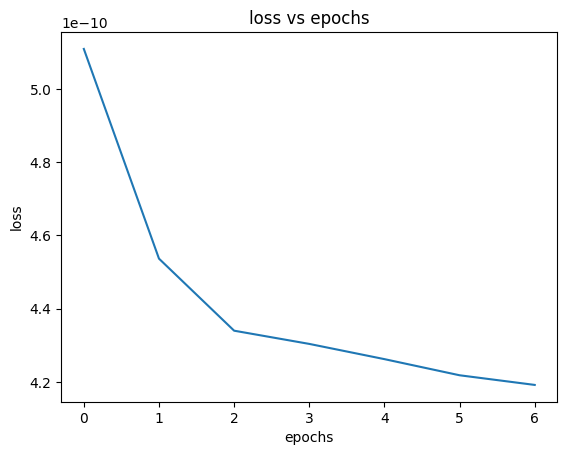

In [ ]:
plt.plot(range(7),history.history['loss'])
plt.title("loss vs epochs")
plt.xlabel("epochs")
plt.ylabel("loss")

Text(0, 0.5, 'cosine_similarity')

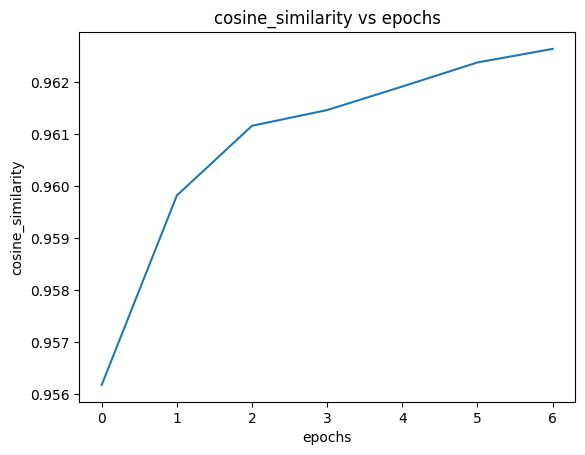

In [ ]:
plt.plot(range(7),history.history['cosine_similarity'])
plt.title("cosine_similarity vs epochs")
plt.xlabel("epochs")
plt.ylabel("cosine_similarity")

##Testing

In [ ]:
vgg_model = VGGFace(model='vgg16', include_top=False, input_shape=(224, 224, 3), pooling='avg')

# Load the saved weights into the model
vgg_model.load_weights('/content/drive/MyDrive/vgg_model_weights1.h5')

###Function

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Function to compare embeddings and assign ID with most similarity

def find_most_similar_face(test_embedding, register_faces_dict):
    similarities = []
    for face_id, registered_embedding in register_faces_dict.items():
        similarity = cosine_similarity([test_embedding], [registered_embedding])[0][0]
        similarities.append(similarity)
    most_similar_index = np.argmax(similarities)
    most_similar_id = list(register_faces_dict.keys())[most_similar_index]
    return most_similar_id

In [ ]:
import pickle
with open('/content/drive/MyDrive/register_faces_dict_training.pkl','rb') as f:
     register_faces_dict = pickle.load(f)

In [ ]:
with open('/content/drive/MyDrive/register_faces_dict_occ1.pkl','rb') as f:
     register_faces_dict_occ = pickle.load(f)

###Test images with orientation

In [ ]:
X_test = np.load("/content/drive/MyDrive/X_test_o.npy")
y_test = np.load("/content/drive/MyDrive/y_test_o.npy")

In [ ]:
embeddings=vgg_model.predict(X_test)

7/7 [==============================] - 177s 25s/step


####Use regular register with frontal faces

In [ ]:
embeddings[0].shape

(512,)

In [ ]:
register_faces_dict[1].shape

(512,)

In [ ]:
assigned_ids = []
for test_embedding in embeddings:
    most_similar_id = find_most_similar_face(test_embedding, register_faces_dict)
    assigned_ids.append(most_similar_id)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, assigned_ids)
print("Accuracy:", accuracy)

Accuracy: 0.92


####Use register with frontal and occluded faces

In [ ]:
assigned_ids = []
for test_embedding in embeddings:
    most_similar_id = find_most_similar_face(test_embedding, register_faces_dict_occ)
    assigned_ids.append(most_similar_id)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, assigned_ids)
print("Accuracy:", accuracy)

Accuracy: 0.93


###Test images with central occulusion(15%)

In [ ]:
X_test = np.load("/content/drive/MyDrive/X_test_c.npy")
y_test = np.load("/content/drive/MyDrive/y_test_c.npy")

In [ ]:
embeddings=vgg_model.predict(X_test)

7/7 [==============================] - 131s 18s/step


####Use regular register with frontal faces

In [ ]:
assigned_ids = []
for test_embedding in embeddings:
    most_similar_id = find_most_similar_face(test_embedding, register_faces_dict)
    assigned_ids.append(most_similar_id)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, assigned_ids)
print("Accuracy:", accuracy)

Accuracy: 0.855


####Use register with frontal and occluded faces

In [ ]:
assigned_ids = []
for test_embedding in embeddings:
    most_similar_id = find_most_similar_face(test_embedding, register_faces_dict_occ)
    assigned_ids.append(most_similar_id)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, assigned_ids)
print("Accuracy:", accuracy)

Accuracy: 0.985


###Test images with right occulusion(15%)

In [ ]:
X_test = np.load("/content/drive/MyDrive/X_test_r.npy")
y_test = np.load("/content/drive/MyDrive/y_test_r.npy")

In [ ]:
embeddings=vgg_model.predict(X_test)

7/7 [==============================] - 132s 19s/step


####Use regular register with frontal faces

In [ ]:
assigned_ids = []
for test_embedding in embeddings:
    most_similar_id = find_most_similar_face(test_embedding, register_faces_dict)
    assigned_ids.append(most_similar_id)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, assigned_ids)
print("Accuracy:", accuracy)

Accuracy: 0.85


####Use register with frontal and occluded faces

In [ ]:
assigned_ids = []
for test_embedding in embeddings:
    most_similar_id = find_most_similar_face(test_embedding, register_faces_dict_occ)
    assigned_ids.append(most_similar_id)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, assigned_ids)
print("Accuracy:", accuracy)

Accuracy: 1.0


###Test images with left occulusion(15%)

In [ ]:
X_test = np.load("/content/drive/MyDrive/X_test_l.npy")
y_test = np.load("/content/drive/MyDrive/y_test_l.npy")

In [ ]:
embeddings=vgg_model.predict(X_test)

7/7 [==============================] - 133s 19s/step


####Use regular register with frontal faces

In [ ]:
assigned_ids = []
for test_embedding in embeddings:
    most_similar_id = find_most_similar_face(test_embedding, register_faces_dict)
    assigned_ids.append(most_similar_id)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, assigned_ids)
print("Accuracy:", accuracy)

Accuracy: 0.92


####Use register with frontal and occluded faces

In [ ]:
assigned_ids = []
for test_embedding in embeddings:
    most_similar_id = find_most_similar_face(test_embedding, register_faces_dict_occ)
    assigned_ids.append(most_similar_id)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, assigned_ids)
print("Accuracy:", accuracy)

Accuracy: 0.995


###Test images with central occulusion(15%) and orientation

In [ ]:
X_test = np.load("/content/drive/MyDrive/X_test_c_o.npy")
y_test = np.load("/content/drive/MyDrive/y_test_c_o.npy")

In [ ]:
embeddings=vgg_model.predict(X_test)

7/7 [==============================] - 137s 19s/step


####Use regular register with frontal faces

In [ ]:
assigned_ids = []
for test_embedding in embeddings:
    most_similar_id = find_most_similar_face(test_embedding, register_faces_dict)
    assigned_ids.append(most_similar_id)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, assigned_ids)
print("Accuracy:", accuracy)

Accuracy: 0.56


####Use register with frontal and occluded faces

In [ ]:
assigned_ids = []
for test_embedding in embeddings:
    most_similar_id = find_most_similar_face(test_embedding, register_faces_dict_occ)
    assigned_ids.append(most_similar_id)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, assigned_ids)
print("Accuracy:", accuracy)

Accuracy: 0.725


###Test images with right occulusion(15%) and orientation

In [ ]:
X_test = np.load("/content/drive/MyDrive/X_test_r_o.npy")
y_test = np.load("/content/drive/MyDrive/y_test_r_o.npy")

In [ ]:
embeddings=vgg_model.predict(X_test)

7/7 [==============================] - 131s 18s/step


####Use regular register with frontal faces

In [ ]:
assigned_ids = []
for test_embedding in embeddings:
    most_similar_id = find_most_similar_face(test_embedding, register_faces_dict)
    assigned_ids.append(most_similar_id)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, assigned_ids)
print("Accuracy:", accuracy)

Accuracy: 0.69


####Use register with frontal and occluded faces

In [ ]:
assigned_ids = []
for test_embedding in embeddings:
    most_similar_id = find_most_similar_face(test_embedding, register_faces_dict_occ)
    assigned_ids.append(most_similar_id)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, assigned_ids)
print("Accuracy:", accuracy)

Accuracy: 0.77


###Test images with left occulusion(15%) and orientation

In [ ]:
X_test = np.load("/content/drive/MyDrive/X_test_l_o.npy")
y_test = np.load("/content/drive/MyDrive/y_test_l_o.npy")

In [ ]:
embeddings=vgg_model.predict(X_test)

7/7 [==============================] - 134s 18s/step


####Use regular register with frontal faces

In [ ]:
assigned_ids = []
for test_embedding in embeddings:
    most_similar_id = find_most_similar_face(test_embedding, register_faces_dict)
    assigned_ids.append(most_similar_id)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, assigned_ids)
print("Accuracy:", accuracy)

Accuracy: 0.585


####Use register with frontal and occluded faces

In [ ]:
assigned_ids = []
for test_embedding in embeddings:
    most_similar_id = find_most_similar_face(test_embedding, register_faces_dict_occ)
    assigned_ids.append(most_similar_id)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, assigned_ids)
print("Accuracy:", accuracy)

Accuracy: 0.705


##HEAT map

In [ ]:
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models

In [ ]:

df_faces=pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/face_register.pkl")

In [ ]:
df_faces

(-0.5, 259.5, 359.5, -0.5)

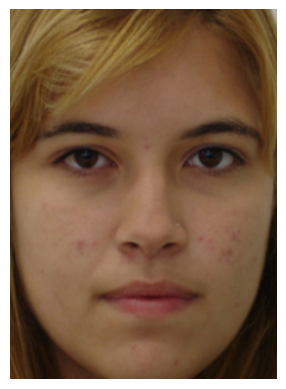

In [ ]:
first_face_image = df_faces.iloc[1]['face']
# Create a new figure
plt.figure()
plt.imshow(first_face_image)
# Plot the first face image
plt.axis('off')

In [ ]:
vgg_model = VGGFace(model='vgg16', include_top=False, input_shape=(224, 224, 3), pooling='avg')

# Load the saved weights into the model
vgg_model.load_weights('/content/drive/MyDrive/vgg_model_weights1.h5')

In [ ]:
# Load the image
image_path = "/content/drive/MyDrive/Colab Notebooks/1.png"
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# Preprocess the image
x = preprocess_input(x)

1/1 [==============================] - 3s 3s/step


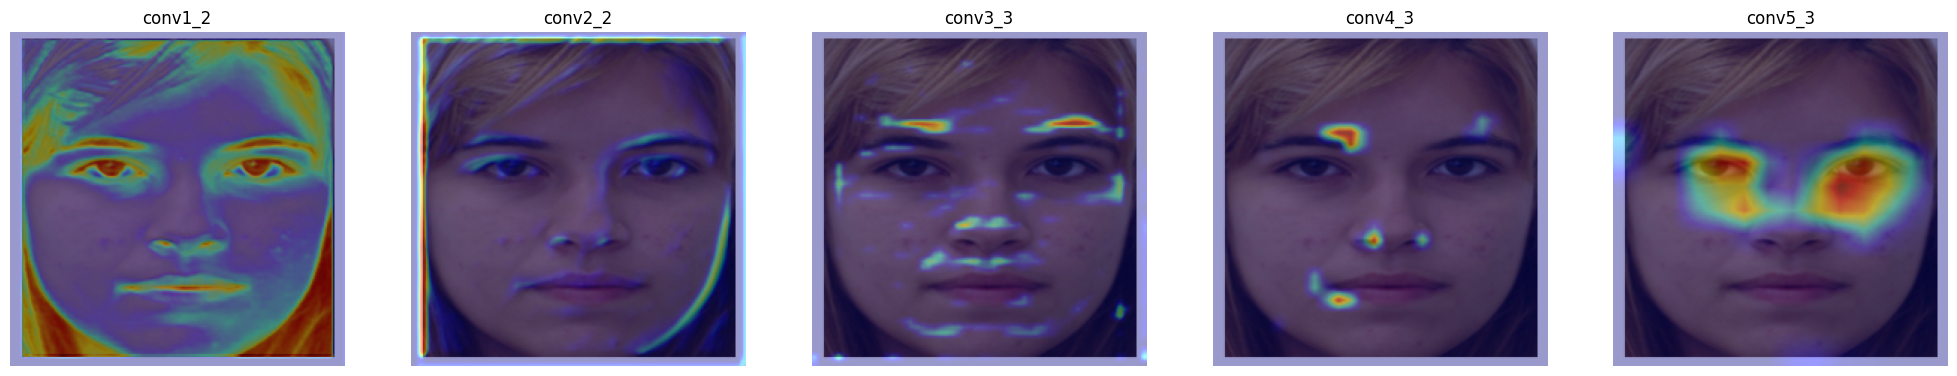

In [ ]:
# Define the layer names for convolutional layers only
conv_layer_names = [
     'conv1_2',
    'conv2_2',
     'conv3_3',
     'conv4_3',
     'conv5_3'
]

layer_outputs = [vgg_model.get_layer(layer_name).output for layer_name in conv_layer_names]
activation_model = models.Model(inputs=vgg_model.input, outputs=layer_outputs)
activations = activation_model.predict(x)

# Display superimposed images for convolutional layers
fig, axs = plt.subplots(1, len(conv_layer_names), figsize=(25, 10))

# Load the original image
original_img = cv2.imread(image_path)
original_img = cv2.resize(original_img, (224, 224))  # Resize to match the model input size

for i, layer_name in enumerate(conv_layer_names):
    # Get the corresponding activation map
    activation = activations[i]

    # Resize activation map to match the original image size
    activation_resized = cv2.resize(activation[0, :, :, 0], (original_img.shape[1], original_img.shape[0]))

    # Normalize activation map
    activation_resized = (activation_resized - activation_resized.min()) / (activation_resized.max() - activation_resized.min())

    # Apply colormap
    heatmap = cv2.applyColorMap(np.uint8(255 * activation_resized), cv2.COLORMAP_JET)

    # Superimpose heatmap on the original image
    superimposed_img = cv2.addWeighted(original_img, 0.6, heatmap, 0.4, 0)

    # Display superimposed image
    axs[i].imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    axs[i].set_title(layer_name)
    axs[i].axis('off')

plt.show()


We can see that deeper convolution layers are focusing on most important features of the face such as eyes,nose etc..